# 7. Sanity check -- Department

This corresponds to the sanity check that will go into each department...

In [1]:
import os
import pathlib

import matplotlib.lines
import matplotlib.patches
import matplotlib.pyplot

from cpe_help import Department, util


def list_files(directory):
    """list all files under a directory tree"""
    return [pathlib.Path(parent) / file
            for parent, _, files in os.walk(directory) 
            for file in files]

In [2]:
dept = Department.sample()

In [3]:
dept

Department('11-00091')

In [4]:
dept.full_name

'11-00091 (Boston, MA)'

In [5]:
print("Input files:")
print()

input_files = list_files(dept.input_dir)
for file in input_files:
    print(file.relative_to(util.path.DATA_DIR))

Input files:

input/department/11-00091/spatial/boston_police_districts_f55.shp
input/department/11-00091/spatial/boston_police_districts_f55.dbf
input/department/11-00091/spatial/boston_police_districts_f55.shx
input/department/11-00091/spatial/boston_police_districts_f55.cst
input/department/11-00091/spatial/boston_police_districts_f55.prj
input/department/11-00091/tabular/11-00091_Field-Interviews_2011-2015.csv


In [6]:
print("Input CRS:")
print()

input_crs = util.io.load_shp(dept.spatial_input_dir).crs
print(input_crs)

Input CRS:

{'init': 'epsg:2249'}


In [7]:
print("Output files:")
print()

output_files = list_files(dept.output_dir)
for file in output_files:
    print(file.relative_to(util.path.DATA_DIR))

Output files:

output/department/11-00091/acs/block_groups.geojson
output/department/11-00091/acs/police_precincts.geojson
output/department/11-00091/acs/city_stats.json
output/department/11-00091/acs/census_tracts.geojson


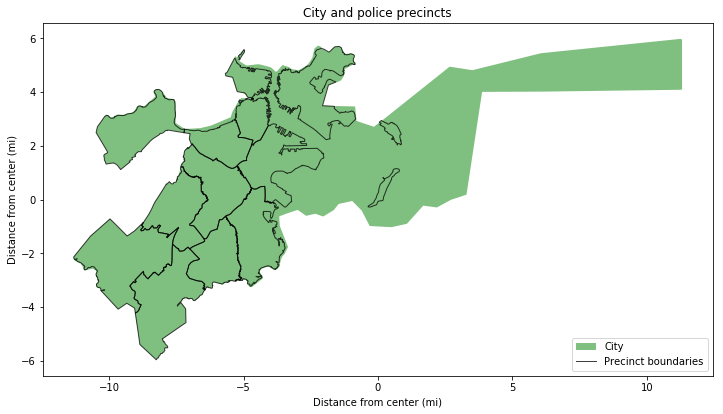

In [8]:
city = dept.load_city_metadata()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(city)
city = city.to_crs(proj)
precincts = precincts.to_crs(proj)

# imports
Line2D = matplotlib.lines.Line2D
Patch = matplotlib.patches.Patch

# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

city.plot(ax=ax, color='green', alpha=0.5)
precincts.plot(ax=ax, color='none', edgecolor='black', alpha=0.75)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='City'),
    Line2D([0], [0], color='black', alpha=0.75, lw=1, label='Precinct boundaries')
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("City and police precincts");

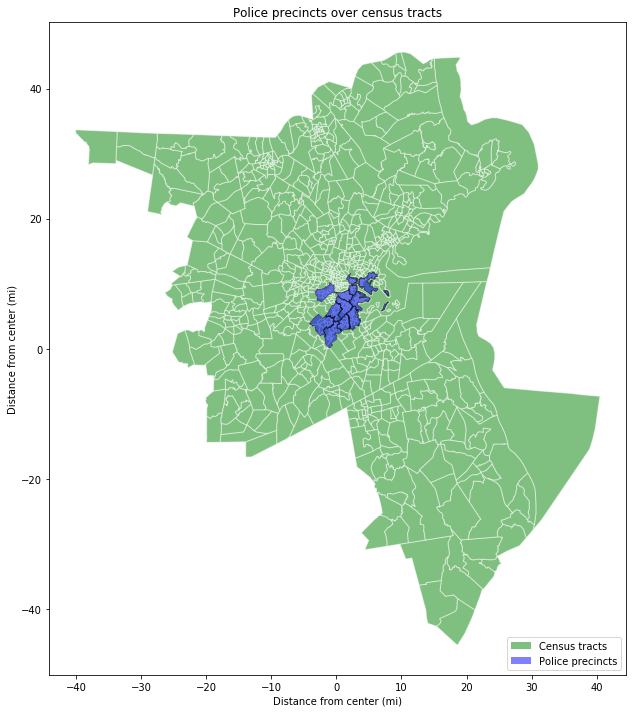

In [9]:
tracts = dept.load_census_tracts()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(tracts)
tracts = tracts.to_crs(proj)
precincts = precincts.to_crs(proj)

# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

tracts.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='Census tracts'),
    Patch(facecolor='blue', alpha=0.5, label='Police precincts'),
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Police precincts over census tracts");

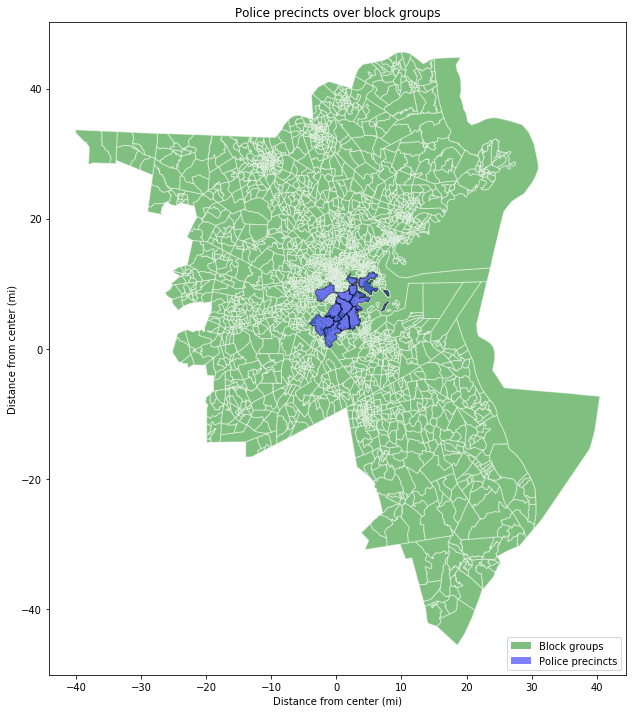

In [10]:
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(bgs)
bgs = bgs.to_crs(proj)
precincts = precincts.to_crs(proj)

# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

bgs.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='Block groups'),
    Patch(facecolor='blue', alpha=0.5, label='Police precincts'),
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Police precincts over block groups");

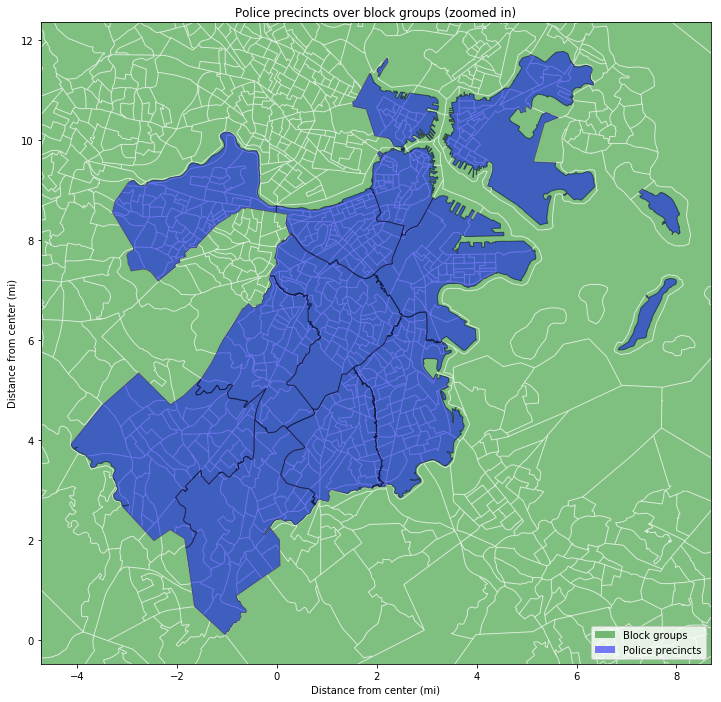

In [11]:
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(bgs)
bgs = bgs.to_crs(proj)
precincts = precincts.to_crs(proj)

# get bounds
fig, ax = matplotlib.pyplot.subplots()
precincts.plot(ax=ax)
bounds = ax.axis()
matplotlib.pyplot.close(fig)

# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

bgs.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='Block groups'),
    Patch(facecolor='blue', alpha=0.5, label='Police precincts'),
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.axis(bounds)
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Police precincts over block groups (zoomed in)");

In [12]:
# load raw dataframes
tracts = dept.load_census_tracts()
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()


# set up equal-area projection
proj = util.crs.equal_area_from_geodf(precincts)
tracts = tracts.to_crs(proj)
bgs = bgs.to_crs(proj)
precincts = precincts.to_crs(proj)


# restrict area to intersection
_area = precincts.unary_union
tracts = tracts[tracts.intersects(_area)]
bgs = bgs[bgs.intersects(_area)]


# calculate densities
tracts['POPULATION_DENSITY'] = tracts['TOTAL_POPULATION'] / tracts.area
bgs['POPULATION_DENSITY'] = bgs['TOTAL_POPULATION'] / bgs.area
precincts['POPULATION_DENSITY'] = precincts['TOTAL_POPULATION'] / precincts.area


# get bounds
fig, ax = matplotlib.pyplot.subplots()
precincts.plot(ax=ax)
bounds = ax.axis()
matplotlib.pyplot.close(fig)

/home/andre/miniconda3/envs/cpe/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


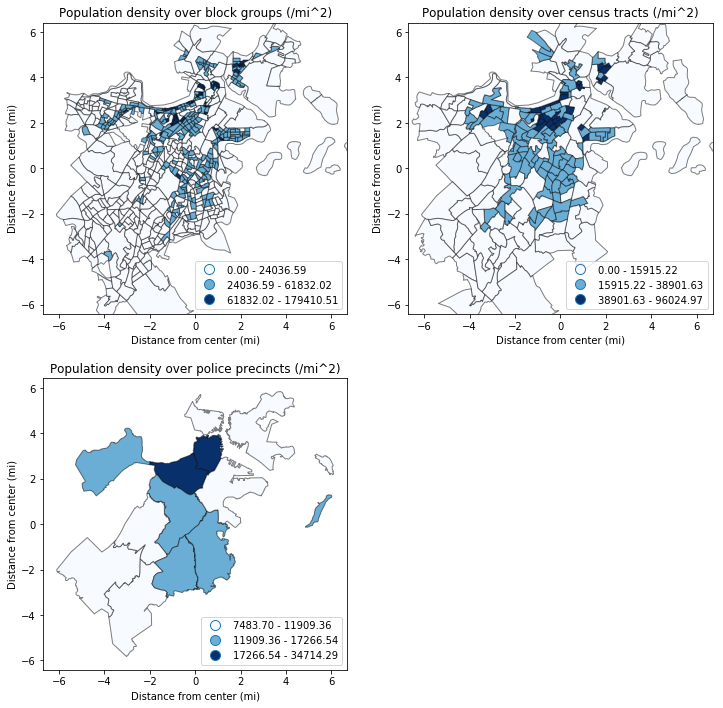

In [13]:
# plot
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes[1][1].remove()


# plot (by block group)
ax = axes[0][0]

bgs.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    scheme='fisher_jenks',
    k=3,
    edgecolor=(0, 0, 0, 0.5),
    legend=True,
    legend_kwds={'loc': 'lower right'},
)

ax.set_aspect('equal')
ax.axis(bounds)
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Population density over block groups (/mi^2)")


# plot (by census tract)
ax = axes[0][1]

tracts.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    scheme='fisher_jenks',
    k=3,
    edgecolor=(0, 0, 0, 0.5),
    legend=True,
    legend_kwds={'loc': 'lower right'},
)

ax.set_aspect('equal')
ax.axis(bounds)
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Population density over census tracts (/mi^2)")


# plot (by police precinct)
ax = axes[1][0]

precincts.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    scheme='fisher_jenks',
    k=3,
    edgecolor=(0, 0, 0, 0.5),
    legend=True,
    legend_kwds={'loc': 'lower right'},
)

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Population density over police precincts (/mi^2)");